## Argo File Loader

In [1]:
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader=ArgoDataFetcher(src='gdac',ftp="/swot/SUM05/dbalwada/Argo_sync",parallel=True)

import filt_funcs as ff
import density_funcs as df
import plot_funcs as pf
import gsw
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Load by box (coordinate: N_PROF)

In [81]:
#box=[lon_min,lon_max,lat_min,lat_max,depth_min,depth_max]
box_lows=[-10,0,-40,-30,0,2000]
box_high=[-55,-45,-45,-35,0,2000]
box_medi=[-20,-10,35,45,0,2000]
box_gyre=[-40,-30,20,30,0,2000]

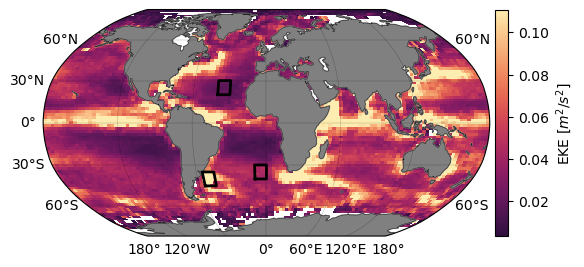

In [82]:
pf.plot_box([box_lows,box_high,box_gyre])

In [83]:
ds_z=ff.get_box(box_gyre,4)

loading points complete


100%|██████████| 168/168 [14:35<00:00,  5.21s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete


In [84]:
ds_z = ds_z.assign_attrs({"Fetched_uri":''})

In [85]:
ds_z

<xarray.Dataset>
Dimensions:                (N_PROF: 1031, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF                 (N_PROF) int64 1316 1317 1319 ... 10378 10379 10447
    TIME                   (N_PROF) datetime64[ns] 2017-05-26T20:53:54 ... 20...
    LATITUDE               (N_PROF) float64 20.48 20.45 20.24 ... 25.37 23.48
    LONGITUDE              (N_PROF) float64 -30.29 -30.72 ... -35.28 -39.99
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998
    N_PROF_NEW             (N_PROF) int64 0 1 2 3 4 ... 1026 1027 1028 1029 1030
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 4 4 4 4 4 4 4 4 4 ... 7 7 7 7 7 7 7 33
    CT                     (N_PROF, PRES_INTERPOLATED) float64 24.52 ... 3.497
    CYCLE_NUMBER           (N_PROF) int32 11 12 16 17 18 19 ... 14 15 16 17 60
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 3901236 3901236 ... 6903715 6903753
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 1.0 ... 1.998e+03
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 36.98 ... 34.92
    SA                     (N_PROF, PRES_INTERPOLATED) float64 37.16 ... 35.09
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 24.97 ... 27.78
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 24.6 ... 3.663
    SPICE                  (N_PROF, PRES_INTERPOLATED) float64 6.282 ... 0.2499
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/07/25
    Fetched_constraints:  [x=-40.00/-30.00; y=20.00/30.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

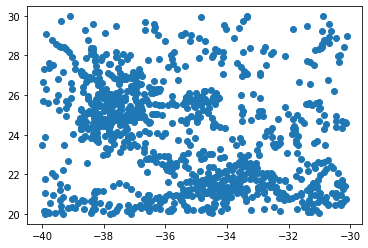

In [86]:
plt.scatter(ds_z.LONGITUDE, ds_z.LATITUDE)

In [87]:
ds_z.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_z.nc".format(box_gyre[0],box_gyre[1],box_gyre[2],box_gyre[3]))

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.6, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_rho.nc".format(box[0],box[1],box[2],box[3]))

## Load by float (coordinate: distance)

In [ ]:
float_ID = 6901265

In [ ]:
ds_z = ff.get_float(float_ID, 4)

In [ ]:
ds_z = ds_z.assign_attrs({"Fetched_uri":''})

In [ ]:
ds_z

In [ ]:
ds_z.to_netcdf("202206_floats/float_ID:({})_ds_z.nc".format(float_ID))

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.4, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_floats/float_ID:({})_ds_rho.nc".format(float_ID))

## Loading Boxes by Degree

In [132]:
lons = np.arange(-180,181,4)
lats = np.arange(-90,91,4)

boxes=[]

for n in range(0,len(lons)-1):
    for m in range(0,len(lats-1)):
        lon_min = lons[n]
        lon_max = lons[n+1]
        lat_min = lats[n]
        lat_max = lats[n+1]
        box_n = np.array([lon_min, lon_max, lat_min, lat_max])
        boxes.append(box_n)

IndexError: index 46 is out of bounds for axis 0 with size 46

In [136]:
n=0
lons[n+1]

-176

In [64]:
from argopy import IndexFetcher as ArgoIndexFetcher

box_bad=[-15,-14,36.5,37]#, '2000-01-01', '2021-06'] # need to remove pressure poinds because the region function for this index fetcher seems a bit different.

idx = ArgoIndexFetcher(src='gdac',dataset='phy',mode='standard',
                            ftp="/swot/SUM05/dbalwada/202203-ArgoData").region(box_bad).load()
idx.index

,file,date,latitude,longitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,aoml/1900041/profiles/D1900041_067.nc,2004-01-02 22:27:49,36.687,-14.002,A,851,AO,2019-05-05 16:50:37,1900041,"AOML, USA","Solo, Seabird conductivity sensor"
1,aoml/1900749/profiles/D1900749_015.nc,2007-05-08 11:55:38,36.716,-14.029,A,851,AO,2019-05-23 14:23:26,1900749,"AOML, USA","Solo, Seabird conductivity sensor"
2,aoml/1900778/profiles/D1900778_123.nc,2011-02-08 11:01:58,36.814,-14.919,A,851,AO,2019-05-30 16:23:14,1900778,"AOML, USA","Solo, Seabird conductivity sensor"
3,coriolis/3901932/profiles/D3901932_118.nc,2021-08-23 06:22:00,36.948,-14.746,A,844,IF,2021-12-01 18:03:09,3901932,"Ifremer, France","Arvor, Seabird conductivity sensor"
4,coriolis/6900137/profiles/D6900137_058.nc,2006-01-21 04:15:00,36.907,-14.205,A,840,IF,2015-10-19 19:21:25,6900137,"Ifremer, France","Provor, no conductivity"
5,coriolis/6900137/profiles/D6900137_059.nc,2006-01-31 04:15:00,36.858,-14.127,A,840,IF,2015-10-19 19:21:26,6900137,"Ifremer, France","Provor, no conductivity"
6,coriolis/6900137/profiles/D6900137_060.nc,2006-02-10 04:39:00,36.954,-14.219,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
7,coriolis/6900137/profiles/D6900137_061.nc,2006-02-20 03:56:00,36.988,-14.305,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
8,coriolis/6900231/profiles/D6900231_036.nc,2004-12-12 17:48:03,36.642,-14.533,A,846,IF,2019-06-03 19:58:58,6900231,"Ifremer, France","Webb Research, Seabird sensor"
9,coriolis/6900231/profiles/D6900231_037.nc,2004-12-22 18:16:56,36.644,-14.734,A,846,IF,2019-06-03 19:58:59,6900231,"Ifremer, France","Webb Research, Seabird sensor"


In [34]:
float_IDs = [1900041,1900749,]

argopy.fetchers.ArgoIndexFetcher